In [167]:
##Import

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

import soundfile as sf
import IPython.display 

def spectrogramme(x_instrument,Fe):
    f, t, tfct = sig.stft(x_instrument, fs=1, nperseg=4096)
    image = np.log(np.abs(tfct))
    #print(np.max(image),np.min(image))
    #print(image)
    cmap = plt.get_cmap('PiYG')
    plt.figure(figsize=(10,4))
    plt.pcolormesh(t/Fe, f*Fe, image, shading='auto', cmap=cmap)  
    plt.xlabel('s')
    plt.ylabel('Hz')
    plt.title('affichage du spectrogramme')
    x_max=len(image[1,:])/Fe/2*4096
    x_ticks = np.arange(0, x_max, 0.5)
    plt.xticks(x_ticks)
    #plt.yscale('log')  # Ajoutez cette ligne pour définir l'échelle de l'axe y sur 'log'
    plt.show()


def show_signal_F(x,Fe):
    T=[i*1/Fe for i in range(len(x))]
    Tec=T[-1]
    F=[i/Tec for i in range(len(x))]
    plt.figure(figsize=(10,4))
    plt.plot(F,x,color='b')
    plt.xlabel('Fréquence en Hz')
    plt.ylabel('Amplitude')
    plt.title('TF du Signal audio')
    plt.grid()
    plt.show()

def detect_color_change(spectrogram, y_value_hz, threshold, Fe, nperseg):
    # Convert the given y value in Hz to the corresponding row index
    row_index = int(y_value_hz * nperseg / Fe)

    # Get the row of the spectrogram corresponding to the given y value
    row = spectrogram[row_index, :]

    # Calculate the difference between consecutive values
    diff = np.diff(row)

    # Find where the difference exceeds the threshold and is positive
    change_points = np.where(diff > threshold)[0]

    # Convert the indices to time values
    change_times = change_points /Fe * nperseg/2
    change_times = np.insert(change_times, 0, 0)

    return change_times

def instant_note(liste,epsilon):
    L=[]
    for i in range(len(liste)-1):
        if liste[i]-epsilon>0:
            L+=[(liste[i]-epsilon,liste[i+1]-epsilon)]
        else:
            L+=[(0,liste[i+1]-epsilon)]
    return L

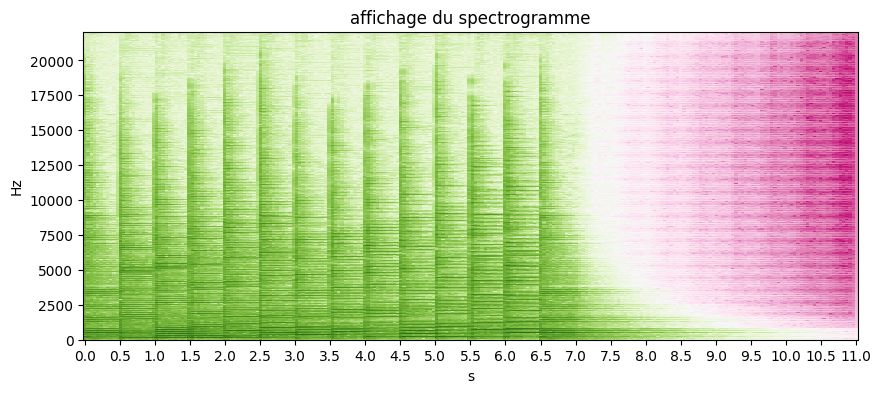

262.0


In [168]:
x_guitare, Fe = sf.read("wav/gamme_demiTon_guitare.wav")


x_guitare = x_guitare[:,0] # nous ne prenons qu'un seul canal

spectrogramme(x_guitare,Fe)

x_fft = np.fft.fft(x_guitare,Fe)
index=np.argmax(np.abs(x_fft[:len(x_fft)//2]))
print(index*Fe/len(x_fft))
#show_signal_F(x_fft,Fe)

IPython.display.Audio(x_guitare, rate=Fe)

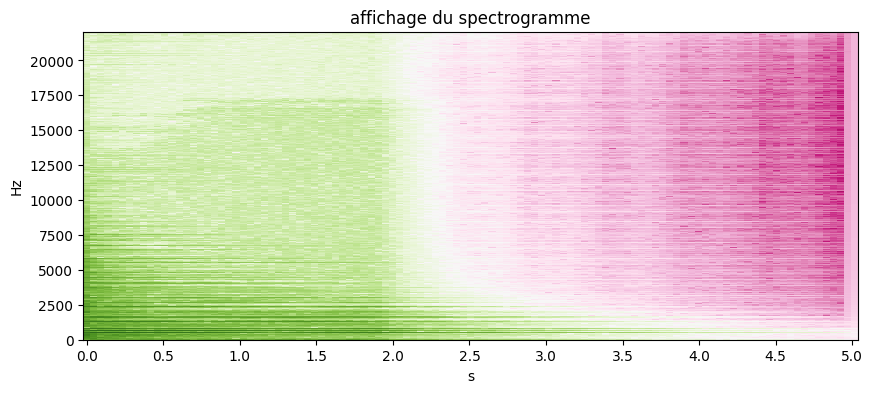

391.0


In [169]:
x_piano, Fe = sf.read("wav/Piano_accord.wav")

x_piano = x_piano[:,0] # nous ne prenons qu'un seul canal

spectrogramme(x_piano,Fe)

x_fft = np.fft.fft(x_piano,Fe)
index=np.argmax(np.abs(x_fft[:len(x_fft)//2]))
print(index*Fe/len(x_fft))
#show_signal_F(np.abs(x_fft),Fe)

IPython.display.Audio(x_piano, rate=Fe)

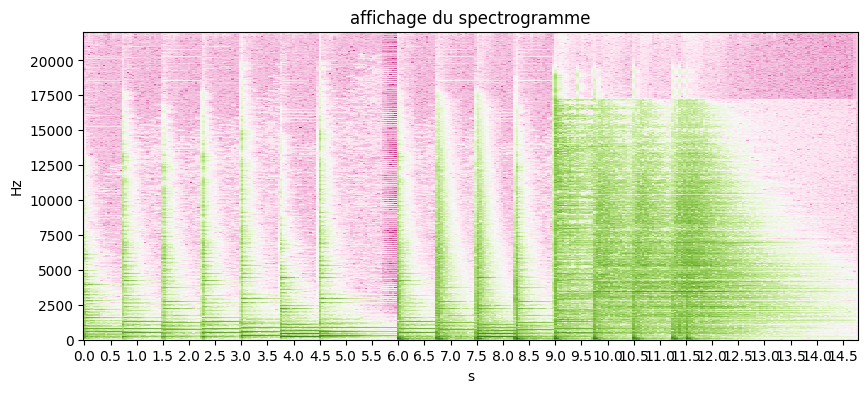

196.0


In [170]:
x_guitare_drums, Fe = sf.read("wav/guitare&drums.wav")

x_guitare_drums = x_guitare_drums[:,0] # nous ne prenons qu'un seul canal

spectrogramme(x_guitare_drums,Fe)

x_fft = np.fft.fft(x_guitare_drums,Fe)
index=np.argmax(np.abs(x_fft[:len(x_fft)//2]))
print(index*Fe/len(x_fft))
#show_signal_F(np.abs(x_fft),Fe)

IPython.display.Audio(x_guitare_drums, rate=Fe)

In [171]:
f, t, tfct = sig.stft(x_guitare_drums, fs=1, nperseg=4096)
image = np.log(np.abs(tfct))
print(detect_color_change(image, 5000, 2,Fe, 4096))

print(instant_note(detect_color_change(image, 5000, 2,Fe, 4096),0.1))


[ 0.          0.69659864  1.43963719  2.18267574  2.22911565  2.92571429
  3.71519274  4.41179138  4.45823129  5.94430839  6.68734694  7.43038549
  8.17342404  8.91646259  8.96290249 12.86385488]
[(0, 0.5965986394557823), (0.5965986394557823, 1.3396371882086167), (1.3396371882086167, 2.082675736961451), (2.082675736961451, 2.1291156462585032), (2.1291156462585032, 2.8257142857142856), (2.8257142857142856, 3.6151927437641724), (3.6151927437641724, 4.311791383219955), (4.311791383219955, 4.358231292517007), (4.358231292517007, 5.844308390022676), (5.844308390022676, 6.587346938775511), (6.587346938775511, 7.330385487528345), (7.330385487528345, 8.07342403628118), (8.07342403628118, 8.816462585034014), (8.816462585034014, 8.862902494331067), (8.862902494331067, 12.763854875283448)]
